In [1]:
from transformers import AutoImageProcessor, SwinForMaskedImageModeling, SwinModel, SwinConfig
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import requests
import rasterio
from rasterio.plot import show

In [2]:
configuration = SwinConfig(image_size=512, num_channels=6)

In [3]:
vanilla_model = SwinModel(configuration)
masked_model = SwinForMaskedImageModeling(configuration)

In [4]:
harvest_image_path = "D:\kerner-lab\lofi\g1_00002_11_harvest.tif"
planting_image_path = "D:\kerner-lab\lofi\g1_00002_11_planting.tif"

In [5]:
harvest_image = rasterio.open(harvest_image_path)
planting_image = rasterio.open(planting_image_path)

In [6]:
# read the image and plot it
harvest_image = harvest_image.read()
planting_image = planting_image.read()

In [7]:
harvest_image_rgb = harvest_image/harvest_image.max() * 255
planting_image_rgb = planting_image/planting_image.max() * 255

In [8]:
harvest_image_rgb = harvest_image_rgb.astype('uint8')
planting_image_rgb = planting_image_rgb.astype('uint8')

image = np.stack([harvest_image_rgb, planting_image_rgb], axis=0)

In [9]:
image = image.reshape(6, image.shape[2], image.shape[3])
image.shape

(6, 512, 512)

In [10]:
harvest_image_rgb = harvest_image_rgb.transpose(1, 2, 0)
planting_image_rgb = planting_image_rgb.transpose(1, 2, 0)
image = image.transpose(1, 2, 0)

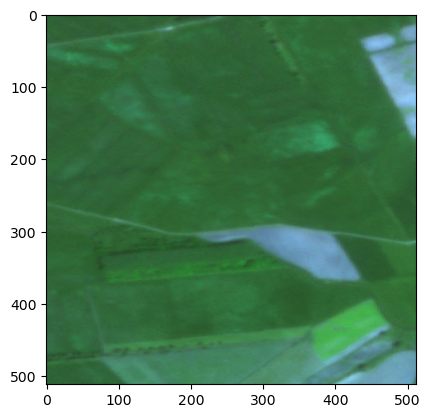

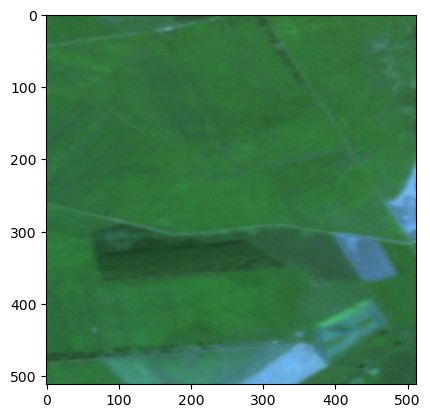

In [11]:
plt.imshow(harvest_image_rgb)
plt.show()

plt.imshow(planting_image_rgb)
plt.show()

In [12]:
model = SwinForMaskedImageModeling(configuration)

In [13]:
num_patches = (model.config.image_size // model.config.patch_size) ** 2
num_patches

16384

In [14]:
image.shape

(512, 512, 6)

In [15]:
# create image tensor with values between -1 and 1 for each channel
pixel_values = torch.tensor(image, dtype=torch.float32) / 127.5 - 1.0

In [16]:
pixel_values = pixel_values.reshape(1, 6, 512, 512)

In [17]:
pixel_values.shape

torch.Size([1, 6, 512, 512])

In [18]:
bool_masked_pos = torch.randint(low=0, high=2, size=(1, num_patches)).bool()

In [19]:
model.config

SwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    6,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 96,
  "encoder_stride": 32,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 512,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "swin",
  "num_channels": 6,
  "num_heads": [
    3,
    6,
    12,
    24
  ],
  "num_layers": 4,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "patch_size": 4,
  "qkv_bias": true,
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "transformers_version": "4.39.3",
  "use_absolute_embeddings": false,
  "window_size": 7
}

In [20]:
outputs = model(pixel_values, bool_masked_pos=bool_masked_pos)

In [23]:
outputs

SwinMaskedImageModelingOutput(loss=tensor(0.5816, grad_fn=<DivBackward0>), reconstruction=tensor([[[[-0.4622, -0.1290, -0.1401,  ..., -0.6540,  0.0199, -0.1728],
          [-0.7317, -0.0908, -0.1056,  ..., -0.5903,  0.5632, -0.2288],
          [-1.0303,  0.3536, -0.0896,  ..., -0.5517,  0.1928,  0.2948],
          ...,
          [ 0.2735, -0.4657,  0.3104,  ...,  0.5976,  0.2149, -0.0745],
          [ 0.2188, -0.0056,  0.8675,  ...,  1.0852, -0.3444,  0.3233],
          [-0.3025, -0.8599,  0.3295,  ...,  0.1509,  0.1892, -0.0622]],

         [[ 0.7173,  0.6035,  0.4527,  ..., -0.7286,  0.6392,  0.2652],
          [-0.3447,  1.4300, -1.2680,  ...,  0.7743,  1.4815, -0.0583],
          [-0.2076, -0.4821,  0.7389,  ..., -0.1949, -0.1012,  0.7934],
          ...,
          [-0.3368,  0.2843, -0.3602,  ..., -0.4014,  0.0505,  0.0300],
          [-0.1881,  0.5758,  0.4850,  ..., -0.7758, -0.2795, -0.6676],
          [-0.0264, -0.6499,  0.6307,  ..., -0.0951,  0.1356, -0.2443]],

         [[-

In [24]:
loss, reconstructed_pixel_values = outputs.loss, outputs.reconstruction

In [25]:
loss.shape, reconstructed_pixel_values.shape

(torch.Size([]), torch.Size([1, 6, 512, 512]))

In [26]:
reconstructed_pixel_values

tensor([[[[-0.4622, -0.1290, -0.1401,  ..., -0.6540,  0.0199, -0.1728],
          [-0.7317, -0.0908, -0.1056,  ..., -0.5903,  0.5632, -0.2288],
          [-1.0303,  0.3536, -0.0896,  ..., -0.5517,  0.1928,  0.2948],
          ...,
          [ 0.2735, -0.4657,  0.3104,  ...,  0.5976,  0.2149, -0.0745],
          [ 0.2188, -0.0056,  0.8675,  ...,  1.0852, -0.3444,  0.3233],
          [-0.3025, -0.8599,  0.3295,  ...,  0.1509,  0.1892, -0.0622]],

         [[ 0.7173,  0.6035,  0.4527,  ..., -0.7286,  0.6392,  0.2652],
          [-0.3447,  1.4300, -1.2680,  ...,  0.7743,  1.4815, -0.0583],
          [-0.2076, -0.4821,  0.7389,  ..., -0.1949, -0.1012,  0.7934],
          ...,
          [-0.3368,  0.2843, -0.3602,  ..., -0.4014,  0.0505,  0.0300],
          [-0.1881,  0.5758,  0.4850,  ..., -0.7758, -0.2795, -0.6676],
          [-0.0264, -0.6499,  0.6307,  ..., -0.0951,  0.1356, -0.2443]],

         [[-0.5504,  0.1043,  0.2357,  ...,  1.1880,  0.1746,  0.4253],
          [-0.2907,  0.0228,  

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-base-simmim-window6-192")
model = SwinForMaskedImageModeling.from_pretrained("microsoft/swin-base-simmim-window6-192")

In [ ]:
pixel_values = image_processor(images=harvest_image_rgb, return_tensors="pt").pixel_values

In [ ]:
pixel_values.shape

In [ ]:
model.config